In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: narasimhaml
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [01:46<00:00, 23.1MB/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: narasimhaml
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset


100%|██████████| 663M/663M [00:31<00:00, 22.3MB/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/saifurrahmanshatil/multiclass-chest-xray-disease-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: narasimhaml
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saifurrahmanshatil/multiclass-chest-xray-disease-dataset


100%|██████████| 2.06G/2.06G [00:23<00:00, 95.7MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

In [ ]:
import cv2

In [ ]:
def grayscale_conversion(image):
  if image.ndim == 3 and image.shape[2] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = np.expand_dims(image, axis=2)
  return image

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
            '/content/chest-xray-pneumonia/chest_xray/train',
            target_size=(224, 224),
            batch_size=32,
            class_mode='binary',
            subset='training')
validation_generator = train_datagen.flow_from_directory(
            '/content/chest-xray-pneumonia/chest_xray/train',
            target_size=(224, 224),
            batch_size=32,
            class_mode='binary',
            subset='validation')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def getimage(a):
    index = a
    batch_index = index // train_generator.batch_size
    image_index_in_batch = index % train_generator.batch_size

    train_generator.reset()
    for i in range(batch_index + 1):
        batch = next(train_generator)

    image = batch[0][image_index_in_batch]
    label = batch[1][image_index_in_batch]

    plt.imshow(image)
    plt.axis('off')
    plt.show()
    label=label=label.astype(int)


    print(f"Shape of image: {image.shape}")
    print(f"Label of image: {classes[label]}")

In [ ]:
classes=["Normal","Pneumonia"]

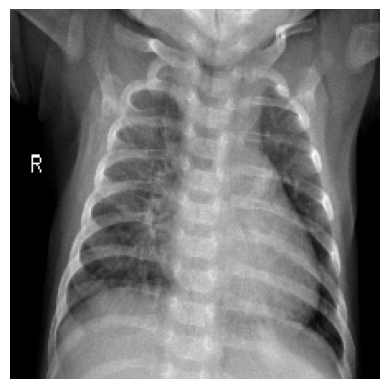

Shape of image: (224, 224, 3)
Label of image: Pneumonia


In [ ]:
getimage(1)

In [ ]:
model=Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=1,activation='softmax')
]
)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model=model.fit(train_generator,epochs=5)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 484s 4s/step - accuracy: 0.7447 - loss: 0.4179
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 485s 4s/step - accuracy: 0.7522 - loss: 0.1025
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 487s 4s/step - accuracy: 0.7363 - loss: 0.0848
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 484s 4s/step - accuracy: 0.7416 - loss: 0.0577
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 484s 4s/step - accuracy: 0.7558 - loss: 0.0437


In [ ]:
def softmax_to_binary(output):
  probability=1/1+np.exp(-output)
  return 1 if probability>0.5 else 0

In [ ]:
y_pred=(model.predict(validation_generator))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


32/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step


In [ ]:
y_pred[:5]

array([[0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994],
       [0.99999994]], dtype=float32)

In [ ]:
import tensorflow as tf
import numpy as np

def predict_image(image_path, model):

  img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_array)
  predicted_class = softmax_to_binary(prediction)

  return predicted_class



In [ ]:
image_path = "/content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg"
predicted_class = predict_image(image_path, model)

print(f"Predicted class: {predicted_class}")
print(f"Predicted class: {classes[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted class: 1
Predicted class: Pneumonia


In [ ]:
from tensorflow import keras
from google.colab import files
model.save('Rudra_xray_model.h5')
files.download('Rudra_xray_model.h5')

### **In the above model instead of sigmoid softmax is used so it gives the wrong output train the model using sigmoid or train it using softmax and two output nodes okay?**

In [ ]:
model=tf.keras.models.load_model("/content/Rudra_xray_model.h5")

In [ ]:
    loss, accuracy = model.evaluate(validation_generator)
    print('Loss: ', loss)
    print('Accuracy: ', accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 424ms/step - accuracy: 0.7361 - loss: 0.1055
Loss:  0.11046051234006882
Accuracy:  0.743048906326294


In [ ]:
model_two=Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=2,activation='softmax')
]
)

model_two.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_two.fit(train_generator, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 472s 4s/step - accuracy: 0.7467 - loss: 0.4757
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.9575 - loss: 0.1122
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 466s 4s/step - accuracy: 0.9653 - loss: 0.1005
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 488s 4s/step - accuracy: 0.9778 - loss: 0.0617
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 471s 4s/step - accuracy: 0.9821 - loss: 0.0447


In [ ]:
loss, accuracy = model_two.evaluate(validation_generator)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9559 - loss: 0.1343
Loss:  0.12080813199281693
Accuracy:  0.9578139781951904


In [ ]:
import tensorflow as tf
import numpy as np

def predict_image(image_path, model):

  img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  prediction = model_two.predict(img_array)
  predicted_class =np.argmax(prediction)

  return predicted_class



In [ ]:
image_path = "/content/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg"
predicted_class = predict_image(image_path, model)

print(f"Predicted class: {predicted_class}")
print(f"Predicted class: {classes[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: 0
Predicted class: Normal


In [ ]:
model_two.save("Rudra2_xray_Model.h5")
files.download("Rudra2_xray_Model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import numpy as np

def predict_image(image_path, model):

  img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_array)
  predicted_class =np.argmax(prediction)

  return predicted_class



In [ ]:
Rudra2=tf.keras.models.load_model("/content/Rudra2_xray_Model.h5")

In [ ]:
print(classes[predict_image("/content/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg",Rudra2)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Normal


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
            '/content/chest-xray-pneumonia/chest_xray/test',
            target_size=(224, 224),
            batch_size=32,
            class_mode='categorical',
            subset='training')

Found 624 images belonging to 2 classes.


In [ ]:
Loss, Accuracy=Rudra2.evaluate(test_generator)
print("Loss: ",Loss)
print("Accuracy: ",Accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 400ms/step - accuracy: 0.7457 - loss: 1.1430
Loss:  1.1898773908615112
Accuracy:  0.7419871687889099


## **In the 2nd iteration I've observed that the model is kinda overfitted. So in the next Iteration train the model with complete train set and also see about drop out and regularization and test with the complete test set**

In [ ]:
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
)

In [ ]:
train_generator = datagen.flow_from_directory(
        '/content/multiclass-chest-xray-disease-dataset/chest_xray/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        color_mode='grayscale'
    )

test_generator = datagen.flow_from_directory(
        '/content/multiclass-chest-xray-disease-dataset/chest_xray/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        color_mode='grayscale'
    )


Found 15794 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


In [ ]:
labels=['Covid-19', 'Lung Opacity', 'Normal','Pneumonia','Tuberculosis']

Exception ignored in: <function _xla_gc_callback at 0x7982a78a2480>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


Lung Opacity


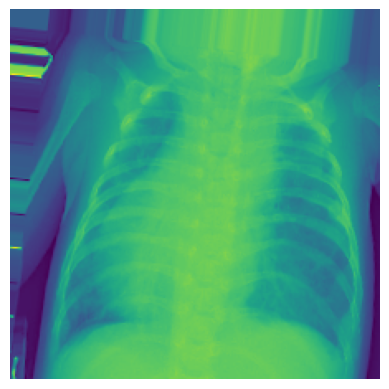

In [ ]:
X_batch, y_batch = next(train_generator)
plt.imshow(X_batch[0])
for ind in y_batch[0]:
  if ind==1:
    print(labels[int(ind)])
plt.axis('off')
plt.show()

In [ ]:
model_three=Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,1)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=5,activation='softmax')
]
)

model_three.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_three.fit(train_generator, epochs=5)

Epoch 1/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 138s 266ms/step - accuracy: 0.5810 - loss: 0.9951
Epoch 2/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 127s 256ms/step - accuracy: 0.7285 - loss: 0.6258
Epoch 3/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 128s 259ms/step - accuracy: 0.7773 - loss: 0.5271
Epoch 4/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 129s 260ms/step - accuracy: 0.8137 - loss: 0.4668
Epoch 5/5
494/494 ━━━━━━━━━━━━━━━━━━━━ 130s 263ms/step - accuracy: 0.8277 - loss: 0.4268


In [ ]:
Loss, Accuracy=model_three.evaluate(test_generator)
print("Loss: ",Loss)
print("Accuracy: ",Accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 390ms/step - accuracy: 0.7911 - loss: 0.5232
Loss:  0.5225391983985901
Accuracy:  0.7967479825019836


In [ ]:
model_three.fit(train_generator, epochs=2)

Epoch 1/2
494/494 ━━━━━━━━━━━━━━━━━━━━ 128s 259ms/step - accuracy: 0.8425 - loss: 0.3959
Epoch 2/2
494/494 ━━━━━━━━━━━━━━━━━━━━ 126s 255ms/step - accuracy: 0.8606 - loss: 0.3492


In [ ]:
Rudra3=tf.keras.models.load_model("/content/Rudra3_xray_Model.h5")

In [ ]:
Loss, Accuracy=Rudra3.evaluate(test_generator)
print("Loss: ",Loss)
print("Accuracy: ",Accuracy)

27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - accuracy: 0.8207 - loss: 0.4999
Loss:  0.5443354845046997
Accuracy:  0.8130081295967102


In [ ]:
from tensorflow import keras
from google.colab import files
model_three.save("Rudra3_xray_Model.h5")
files.download("Rudra3_xray_Model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import numpy as np

def predict_image(image_path, model):

  image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
  image = np.array(image)
  image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  image = np.expand_dims(image, axis=2)
  image=image/255
  img_array = tf.keras.utils.img_to_array(image)
  img_array = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_array)
  predicted_class = np.argmax(prediction)
  predicted_class = labels[predicted_class]

  return predicted_class

In [ ]:
print(predict_image("/content/multiclass-chest-xray-disease-dataset/chest_xray/val/Lung_Opacity/Lung_Opacity-13.png",Rudra3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
Lung Opacity


In [ ]:
print(predict_image("/content/multiclass-chest-xray-disease-dataset/chest_xray/val/COVID/COVID19(567).jpg",Rudra3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
Covid-19


In [ ]:
print(predict_image("/content/multiclass-chest-xray-disease-dataset/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg",Rudra3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Normal


In [ ]:
print(predict_image("/content/multiclass-chest-xray-disease-dataset/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg",Rudra3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Pneumonia


In [ ]:
print(predict_image("/content/multiclass-chest-xray-disease-dataset/chest_xray/val/TURBERCULOSIS/Tuberculosis-656.png",Rudra3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Tuberculosis
